In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
df = pd.read_csv('Consumer Airfare.csv')

# Display the first few rows of the DataFrame
df


,tbl,Year,quarter,citymarketid,city,markets,cur_passengers,cur_fare,cur_yield,distance,ly_passengers,ly_fare,ly_yield,ly_distance,Geocoded_City,tbl2pk
0,Table 2,2021,4,34576,"Rochester, NY",7,170560,162.92,25.13,648.2,42450.0,150.54,19.47,773.4,NaN,2021434576
1,Table 2,2021,4,33495,"New Orleans, LA",30,1571520,186.78,18.88,989.5,656740.0,150.32,14.74,1019.7,NaN,2021433495
2,Table 2,2021,4,32337,"Indianapolis, IN",25,1246520,206.51,19.79,1043.7,570540.0,164.68,15.26,1079.1,NaN,2021432337
3,Table 2,2021,4,33214,"San Antonio, TX",30,1219290,207.84,18.36,1131.7,530200.0,185.53,16.06,1155.0,NaN,2021433214
4,Table 2,2021,4,32600,"Little Rock, AR",7,126870,191.80,23.06,831.6,68150.0,166.98,18.49,902.9,NaN,2021432600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,Table 2,2023,4,30257,"Albany, NY",6,209720,217.40,23.44,927.5,194750.0,227.81,24.95,913.0,NaN,2023430257
8023,Table 2,2023,4,33044,"Louisville, KY",14,530260,208.94,23.04,906.9,468520.0,241.25,27.19,887.4,NaN,2023433044
8024,Table 2,2023,4,30647,"Cleveland, OH (Metropolitan Area)",24,1435980,206.65,20.13,1026.8,1396780.0,215.93,21.09,1023.7,NaN,2023430647
8025,Table 2,2023,4,34524,"Richmond, VA",13,565040,221.46,22.12,1001.3,531230.0,231.37,24.09,960.5,NaN,2023434524


In [50]:
df.dropna()


,tbl,Year,quarter,citymarketid,city,markets,cur_passengers,cur_fare,cur_yield,distance,ly_passengers,ly_fare,ly_yield,ly_distance,Geocoded_City,tbl2pk
313,Table 2,2013,3,30713,"Boise, ID",9,299650,180.68,28.91,624.8,284550.0,172.33,26.46,651.1,"Boise, ID\n(43.597772, -83.884521)",2013330713
316,Table 2,2007,1,33316,"Omaha, NE",17,546540,160.75,16.71,961.4,540610.0,163.22,16.55,986.2,"Omaha, NE\n(46.07035, -93.666319)",2007133316
317,Table 2,2006,1,34570,"Reno, NV",16,730430,133.66,18.43,724.9,644590.0,121.06,14.67,825.0,"Reno, NV\n(30.177159, -95.162771)",2006134570
321,Table 2,2006,4,30198,"Pittsburgh, PA",27,1408670,147.41,15.96,923.2,1259910.0,168.33,17.42,966.0,"Pittsburgh, PA\n(40.442169, -79.994945)",2006430198
322,Table 2,2019,3,33214,"San Antonio, TX",30,1392210,213.33,19.03,1121.0,1378070.0,209.47,18.78,1115.5,"(29.425173, -98.494599)",2019333214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,Table 2,2013,2,33158,"Midland/Odessa, TX",2,108930,190.34,49.15,387.2,98690.0,176.41,44.66,395.0,"Midland/Odessa, TX\n(31.997433, -102.078043)",2013233158
7630,Table 2,2010,1,31423,"Des Moines, IA",7,134080,183.36,15.26,1201.2,114200.0,189.47,15.98,1185.2,"Des Moines, IA\n(41.588822, -93.620309)",2010131423
7631,Table 2,2005,4,34685,"Savannah, GA",5,136660,161.37,23.05,699.9,142390.0,139.23,19.77,703.9,"Savannah, GA\n(40.115007, -111.654713)",2005434685
7632,Table 2,2005,3,33192,"Sacramento, CA",25,1889930,135.12,15.11,893.9,1702580.0,128.21,13.75,932.2,"Sacramento, CA\n(38.582087, -121.50012)",2005333192


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8027 entries, 0 to 8026
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tbl             8027 non-null   object 
 1   Year            8027 non-null   int64  
 2   quarter         8027 non-null   int64  
 3   citymarketid    8027 non-null   int64  
 4   city            8027 non-null   object 
 5   markets         8027 non-null   int64  
 6   cur_passengers  8027 non-null   int64  
 7   cur_fare        8027 non-null   float64
 8   cur_yield       8027 non-null   float64
 9   distance        8027 non-null   float64
 10  ly_passengers   8024 non-null   float64
 11  ly_fare         8024 non-null   float64
 12  ly_yield        8024 non-null   float64
 13  ly_distance     8024 non-null   float64
 14  Geocoded_City   6701 non-null   object 
 15  tbl2pk          8027 non-null   int64  
dtypes: float64(7), int64(6), object(3)
memory usage: 1003.5+ KB


In [67]:
df.describe()

,Year,quarter,citymarketid,markets,cur_passengers,cur_fare,cur_yield,distance,ly_passengers,ly_fare,ly_yield,ly_distance,tbl2pk
count,8027.000000,8027.000000,8027.000000,8027.000000,8.027000e+03,8027.000000,8027.000000,8027.000000,8.024000e+03,8024.000000,8024.000000,8024.000000,8.027000e+03
mean,2009.546904,2.505668,32175.588015,28.153980,2.060422e+06,182.723209,19.625062,963.593871,2.014700e+06,180.160188,19.374768,961.683113,2.009830e+09
std,8.085383,1.118479,1516.019556,20.120233,2.708586e+06,36.790237,5.349774,196.158967,2.659634e+06,36.307131,5.225189,195.711147,8.086582e+06
min,1996.000000,1.000000,30140.000000,2.000000,1.000900e+05,71.290000,9.310000,334.900000,7.500000e+02,70.540000,9.180000,334.900000,1.996130e+09
25%,2003.000000,2.000000,30721.000000,11.000000,3.192550e+05,157.510000,16.050000,853.750000,3.105625e+05,155.677500,15.870000,850.600000,2.003131e+09
50%,2009.000000,3.000000,31884.000000,23.000000,9.350300e+05,183.190000,18.850000,971.700000,9.137250e+05,179.670000,18.580000,969.050000,2.009435e+09
75%,2016.000000,4.000000,33342.000000,42.000000,2.711645e+06,210.230000,22.260000,1089.550000,2.637630e+06,206.840000,21.920000,1088.325000,2.016435e+09
max,2023.000000,4.000000,35412.000000,81.000000,1.743500e+07,346.760000,71.760000,1500.000000,1.699241e+07,326.680000,71.760000,1499.000000,2.023435e+09


In [14]:
duplicate = df.duplicated()

df.drop_duplicates(inplace=True)
#Removing duplicated values in your data

In [18]:
#df = pd.get_dummies(df, columns=['cur_fare'])
#pd.get_dummies will create new columns, each representing a unique category in the original column. Each row will have a 1 in the column corresponding to its original category and 0 in all other newly created columns.



In [61]:
x = df[['cur_passengers','cur_fare','cur_yield','distance','ly_passengers','ly_fare','ly_yield','ly_distance']]
y = df['distance']

In [ ]:
#TO plot a probability plot ,you have to import scipy.prob as stats and also imprt pylab
#stats.probplot(residual , dist)

In [80]:
df = df[["Year","quarter","cur_passengers","distance","ly_passengers"]]
df

,Year,quarter,cur_passengers,distance,ly_passengers
0,2021,4,170560,648.2,42450.0
1,2021,4,1571520,989.5,656740.0
2,2021,4,1246520,1043.7,570540.0
3,2021,4,1219290,1131.7,530200.0
4,2021,4,126870,831.6,68150.0
...,...,...,...,...,...
8022,2023,4,209720,927.5,194750.0
8023,2023,4,530260,906.9,468520.0
8024,2023,4,1435980,1026.8,1396780.0
8025,2023,4,565040,1001.3,531230.0


In [101]:
#finding th  correaltion of each column 
correlation_matrix =df.corr(method='pearson')

print(correlation_matrix)




                    Year   quarter  cur_passengers  distance  ly_passengers
Year            1.000000  0.003474        0.057792  0.177389       0.059718
quarter         0.003474  1.000000        0.022203 -0.016977       0.022080
cur_passengers  0.057792  0.022203        1.000000  0.490151       0.957146
distance        0.177389 -0.016977        0.490151  1.000000       0.496535
ly_passengers   0.059718  0.022080        0.957146  0.496535       1.000000


In [102]:
#finding the correlation of column distance with other  columns 
correlation_with_distance = correlation_matrix['distance']
print(correlation_with_distance)

Year              0.177389
quarter          -0.016977
cur_passengers    0.490151
distance          1.000000
ly_passengers     0.496535
Name: distance, dtype: float64


In [10]:
sns.heatmap(df.corr)
plt.show()

ValueError: Must pass 2-d input. shape=()

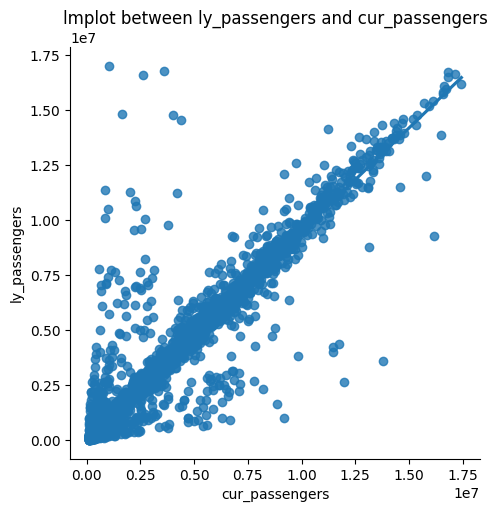

In [7]:
sns.lmplot(x ='cur_passengers',y= 'ly_passengers' ,data=df, fit_reg=True,ci=None)
plt.title('lmplot between ly_passengers and cur_passengers')
plt.show()

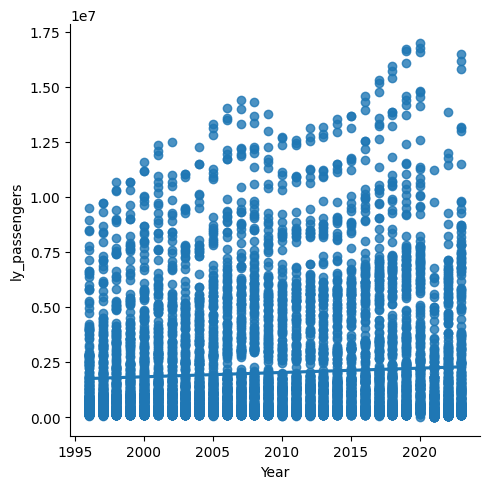

In [8]:
sns.lmplot(x ='Year',y= 'ly_passengers' ,data=df, fit_reg=True,ci=None)
plt.show()

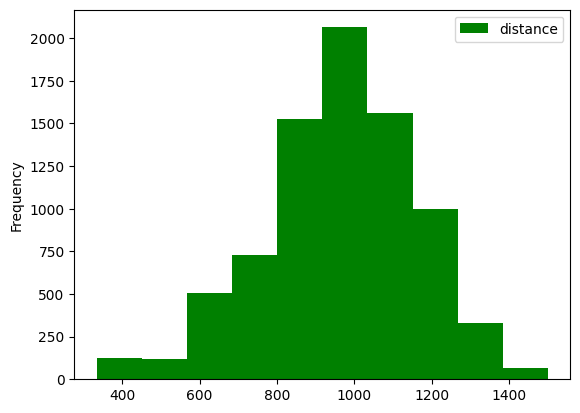

In [9]:
#histogram showing distance
df.plot.hist(y = "distance",color='green')
plt.show()

In [111]:
#put the data in the training mode data set
train = df[df["Year"] <2006].copy()
test = df[df["Year"] >=2006].copy()


In [114]:
train_shape = train.shape

In [129]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

predictors = (["cur_passengers","ly_passengers"])
target = "distance" 

In [136]:
reg.fit(train[predictors],train["distance"])

LinearRegression()

In [1]:
predictions = reg.predict(test[predictors])

NameError: name 'reg' is not defined

In [135]:
predictions

NameError: name 'predictions' is not defined